# 04: Simple neural net with PyTorch

In [5]:
# set path containing data folder or use default for Colab (/gdrive/My Drive)
local_folder = "../data/"
import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/guiwitz/DLImaging/master/utils/check_colab.py",
    "check_colab.py",
)
from check_colab import set_datapath

colab, datapath = set_datapath(local_folder)

In [6]:
from torch import nn

In [8]:
# Create a linear layer that takes vector size 5 as input, and outputs a vector size 1044

lin_layer = nn.Linear(in_features=5, out_features=10)

In [9]:
# List the parameters in this single layer
list(lin_layer.parameters())

[Parameter containing:
 tensor([[-0.1779,  0.0162,  0.1071,  0.1480,  0.2520],
         [-0.3636, -0.0121,  0.2301, -0.3110,  0.2177],
         [ 0.0049,  0.0515, -0.1537, -0.1819,  0.2006],
         [ 0.1041,  0.1215, -0.4115,  0.4316,  0.3082],
         [-0.2739, -0.1229, -0.2028, -0.4442, -0.0129],
         [ 0.2589, -0.3987, -0.3436, -0.2493,  0.3565],
         [ 0.2068,  0.1677,  0.1162, -0.1332, -0.3953],
         [-0.1140, -0.0924, -0.3707, -0.0389, -0.3662],
         [-0.3512,  0.1609, -0.3754,  0.0732,  0.3477],
         [ 0.4117, -0.4382,  0.1940,  0.2954,  0.4158]], requires_grad=True),
 Parameter containing:
 tensor([-0.1796, -0.1648,  0.1016, -0.0352, -0.3685,  0.3684,  0.0512, -0.2877,
          0.3640,  0.0656], requires_grad=True)]

### Passing an input

Our layer takes a vector as an input so let's try to creat a vector of size 5 and pass it through the layer:

In [10]:
import numpy as np

In [11]:
myvector = np.random.randint(0, 100, 5)
myvector

array([63, 19, 83,  9, 86])

Pass it to lin_layer:

In [12]:
lin_layer(myvector)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

We get an error, as the layer doesn't expect a Numpy array but a PyTorch tensor
We can convert Numpy array into a tensor:

In [13]:
import torch

In [14]:
mytensor = torch.tensor(myvector)
mytensor

tensor([63, 19, 83,  9, 86])

In [15]:
lin_layer(mytensor)

RuntimeError: expected scalar type Long but found Float

Error: The weights in the layer are by default float32. So the input should match this. However we passed 64 bit integers, creating a conflict. 
Modify the tensor:

In [16]:
mytensor.dtype

torch.int64

In [17]:
mytensor_float = mytensor.float()
mytensor_float

tensor([63., 19., 83.,  9., 86.])

In [18]:
mytensor_float.dtype

torch.float32

**To do it earlier on while converting numpy to tensor:**

In [19]:
mytensor_float = torch.tensor(myvector, dtype=torch.float32)

In [20]:
output = lin_layer(mytensor_float)
output

tensor([ 20.8244,  11.7207,   4.2427,   5.0643, -41.9050,   9.0024,  -9.2801,
        -71.8446, -19.3030,  72.1947], grad_fn=<AddBackward0>)

In [21]:
output.size()

torch.Size([10])

Output has expected size of 10!

Can add other layers:

In [22]:
lin_layer2 = nn.Linear(10, 3)
output = lin_layer2(output)

In [23]:
output.size()

torch.Size([3])

## Activation

In addition to layers, we will also need activation functions such as soft max.

These are implemented as modules in **torch.nn** as well as functions in **torch.functional** which we will use here:

In [24]:
import torch.nn.functional as F

As we use the functional form, we can pass the output of the above linear layer directly to the activation function, here as a ReLU:

In [25]:
lin_layer_activated = F.relu(output)

In [26]:
lin_layer_activated

tensor([9.1110, 0.0000, 9.8229], grad_fn=<ReluBackward0>)

## Structure of a network

Now that we have seen how to create a layers and activation functions we can assemble them into a usable network structure. In PyTorch that structure is nn.Module a base class on top of which we can build our network. We can specify what parameters we want to pass when creating this object and we also have to define a single function, forward, which describes the network itself. Here's an example:

In [27]:
class Mynetwork(nn.Module):
    def __init__(self, myparameter1, myparameter2):
        super(Mynetwork, self).__init__()

        # define layers here
        self.layer1 = nn.Linear(myparameter1, 5)
        self.layer2 = nn.Linear(5, myparameter2)

    def forward(self, x):

        # define the sequence of operations in the network including eg. activations
        x = F.relu(self.layer1(x))
        x = self.layer2(x)    

        return x


Here, we defined: 
- a simple network defined by two parameters: **myparameter1**, **myparameter2** which is comprised of 2 linear layers and a ReLU unit.
- The different layers that we need are defined in __init__ as object parameters and then re-used in the network definition in the **forward** function
- **forward** takes an input **x** (eg. an image to classify), passes it through the network and outputs the result
- So, in principal we could instantiate a model and use it like this: 

        $ mymodel = Mynetwork(9,3)
        $ mymodel.forward(myinput)

However, **nn.Module** has a __call__ attribute that allows us to use the class as a function like this:

        $ mymodel = Mynetwork(9,3)
        $ mymodel(myinput)

*This is how a model should be used properly, to expoit all the capabilities offered in PyTorch*

Trying it out, we instantiate the model:

In [28]:
mymodel = Mynetwork(9, 3)

Just like for the single linear layer before, we can have a look at all parameters:

In [29]:
list(mymodel.parameters())

[Parameter containing:
 tensor([[-0.2405, -0.0314,  0.0445,  0.1893, -0.2145,  0.2263, -0.1293,  0.1796,
          -0.0851],
         [ 0.2658, -0.1127, -0.1390,  0.2939,  0.1878,  0.2775, -0.2241,  0.2113,
          -0.3239],
         [ 0.3303,  0.1769,  0.0118,  0.0833, -0.0483, -0.1831, -0.2755,  0.0318,
          -0.2746],
         [-0.2200,  0.0710,  0.1353, -0.2887, -0.2479, -0.0329, -0.0573, -0.2161,
          -0.1448],
         [-0.0572,  0.0697, -0.1516,  0.2318, -0.2771,  0.1091, -0.0020,  0.1656,
          -0.0006]], requires_grad=True),
 Parameter containing:
 tensor([-0.0047, -0.3082,  0.3270, -0.1414,  0.3297], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3790, -0.4088,  0.2541, -0.0737, -0.4415],
         [ 0.1229, -0.1393, -0.3574,  0.0630,  0.2214],
         [ 0.2731,  0.1220, -0.4157,  0.1453,  0.3877]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4087,  0.0840, -0.2557], requires_grad=True)]

In [30]:
list(mymodel.modules())

[Mynetwork(
   (layer1): Linear(in_features=9, out_features=5, bias=True)
   (layer2): Linear(in_features=5, out_features=3, bias=True)
 ),
 Linear(in_features=9, out_features=5, bias=True),
 Linear(in_features=5, out_features=3, bias=True)]

We see some repeats because we see here modules at all levels. E.g. each linear layer is a module but our entire network is a module as well.

We can also just find all modules contained in our main module and recover its name and function:

In [31]:
for name, module in mymodel.named_children():
    print(f'name: {name} module: {module}')

name: layer1 module: Linear(in_features=9, out_features=5, bias=True)
name: layer2 module: Linear(in_features=5, out_features=3, bias=True)


Get a dictionary of all layers with their weights:

In [32]:
mymodel.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.2405, -0.0314,  0.0445,  0.1893, -0.2145,  0.2263, -0.1293,  0.1796,
                       -0.0851],
                      [ 0.2658, -0.1127, -0.1390,  0.2939,  0.1878,  0.2775, -0.2241,  0.2113,
                       -0.3239],
                      [ 0.3303,  0.1769,  0.0118,  0.0833, -0.0483, -0.1831, -0.2755,  0.0318,
                       -0.2746],
                      [-0.2200,  0.0710,  0.1353, -0.2887, -0.2479, -0.0329, -0.0573, -0.2161,
                       -0.1448],
                      [-0.0572,  0.0697, -0.1516,  0.2318, -0.2771,  0.1091, -0.0020,  0.1656,
                       -0.0006]])),
             ('layer1.bias',
              tensor([-0.0047, -0.3082,  0.3270, -0.1414,  0.3297])),
             ('layer2.weight',
              tensor([[ 0.3790, -0.4088,  0.2541, -0.0737, -0.4415],
                      [ 0.1229, -0.1393, -0.3574,  0.0630,  0.2214],
                      [ 0.2731,  0.1220, -0.4157,  0.1453,

Finally, pass an input through our network. It takes an input of size 9:

In [33]:
my_input = torch.randn((9,))

In [34]:
my_input

tensor([ 0.5746,  0.3414, -0.3245, -0.7431,  0.0998, -1.7286,  0.2440,  0.9292,
        -0.1772])

In [35]:
output = mymodel(my_input)

In [36]:
output

tensor([ 0.5610, -0.1842, -0.5501], grad_fn=<AddBackward0>)

## Batches

To use batch processing:
- we can pass batches of vectors through the network instead of single vectors
- PyTorch layers are designed to handle this by default
- eg. if we want to use a batch size = 32, we can use a 32 x 8 tensor 
- we can create one directly with **torch.randn** 

In [37]:
batch_tensor = torch.randn(32, 9)
batch_tensor.shape

torch.Size([32, 9])

In [38]:
batch_output = mymodel(batch_tensor)

In [39]:
batch_output.shape

torch.Size([32, 3])

### Passing an image as input

In [40]:
from skimage.draw import random_shapes
import matplotlib.pyplot as plt



Create a 32x32 image of a circle.

And invert image, set object as foreground:

In [41]:
image_circle, _ = random_shapes((32,32),max_shapes=1, min_shapes=1, shape='circle',
                                num_channels=1, channel_axis=None, min_size=8, random_seed=2)
image_circle = 255-image_circle

image_tensor = torch.tensor(image_circle, dtype=torch.float32)

In [42]:
image_tensor.shape

torch.Size([32, 32])

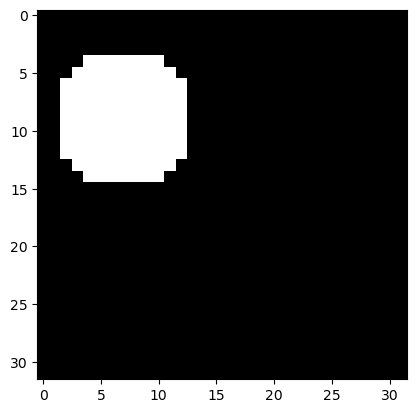

In [43]:
plt.imshow(image_tensor, cmap='gray');

Flatten image:

In [44]:
image_flat = image_tensor.view(-1)
image_flat.shape

torch.Size([1024])

Adjust network input size:

In [45]:
mymodel = Mynetwork(1024, 20) # 20 being the output size

In [46]:
output = mymodel(image_flat)

In [47]:
output

tensor([ 5.2520, -7.0107,  7.3671, -4.5744, -0.4085,  1.9118,  3.7570, -3.1571,
         5.0164,  3.6873,  4.6132, -1.8890, -0.1762,  5.1063,  0.0259,  1.6147,
         1.1474,  5.9287, -5.4702, -8.2178], grad_fn=<AddBackward0>)

Note: flattening can be performed at different points. instead of flattening input, could have also flattened within our network definition:

In [48]:
class Mynetwork2(nn.Module):
    def __init__(self, myparameter1, myparameter2):
        super(Mynetwork2, self).__init__()

        # define layers here
        self.layer1 = nn.Linear(myparameter1, myparameter2)


    def forward(self, x):

        # Flatten
        x = x.view(-1) 
        # define the sequence of operations in the network including eg. activations
        x = F.relu(self.layer1(x))
        
        return x

In [49]:
second_model = Mynetwork2(1024, 20)

In [50]:
output = second_model(image_tensor)
output

tensor([ 0.0000,  0.0000,  0.1178,  0.0000, 10.1880, 21.8004,  0.0000,  0.0000,
         1.6279,  0.0000,  8.9031,  3.9350,  0.0000,  0.3043,  0.0000,  0.0000,
         0.0000,  0.0000,  2.8219,  0.0000], grad_fn=<ReluBackward0>)

In [51]:
output.shape

torch.Size([20])

### Saving and loading a model

Next notebook we will train our network. During this we will want to save our model and weights.


Two ways to do this:

### Save full model

- Save the entire model so it can be reloaded
- Can be problematic if moving saved models between computers.
- Created a models folder in dir

In [52]:
torch.save(second_model, datapath.joinpath('../models/simpleNN.pt'))

To reload:

In [53]:
third_model = torch.load(datapath.joinpath('../models/simpleNN.pt'))

In [54]:
third_model(image_tensor)

tensor([ 0.0000,  0.0000,  0.1178,  0.0000, 10.1880, 21.8004,  0.0000,  0.0000,
         1.6279,  0.0000,  8.9031,  3.9350,  0.0000,  0.3043,  0.0000,  0.0000,
         0.0000,  0.0000,  2.8219,  0.0000], grad_fn=<ReluBackward0>)

### Saving model state

Alternatively we can simply save all the parameters, which is a safer method. We simply recover them using state_dict:

In [55]:
torch.save(third_model.state_dict(),datapath.joinpath('../models/simpleNN_state.pt'))

To reload the parameters, we first instantiate the model & and 'fill' with those values using **load_state_dict**:

In [56]:
fourth_model = Mynetwork2(1024, 20)

In [57]:
params = torch.load(datapath.joinpath('../models/simpleNN_state.pt'))
params

OrderedDict([('layer1.weight',
              tensor([[-0.0073,  0.0234,  0.0026,  ..., -0.0276, -0.0108, -0.0041],
                      [ 0.0006,  0.0163, -0.0058,  ...,  0.0281, -0.0308, -0.0085],
                      [ 0.0223, -0.0206,  0.0210,  ..., -0.0199,  0.0009, -0.0019],
                      ...,
                      [ 0.0262,  0.0261,  0.0304,  ..., -0.0115, -0.0248,  0.0138],
                      [-0.0220,  0.0058, -0.0292,  ...,  0.0201,  0.0053, -0.0135],
                      [-0.0092, -0.0119,  0.0065,  ...,  0.0254,  0.0276,  0.0144]])),
             ('layer1.bias',
              tensor([ 0.0083, -0.0018, -0.0050,  0.0016, -0.0220, -0.0220,  0.0194,  0.0085,
                       0.0154,  0.0086,  0.0022, -0.0088,  0.0311,  0.0299,  0.0276, -0.0152,
                       0.0016, -0.0192,  0.0052, -0.0299]))])

In [58]:
fourth_model.load_state_dict(params)

<All keys matched successfully>

In [59]:
fourth_model(image_tensor)

tensor([ 0.0000,  0.0000,  0.1178,  0.0000, 10.1880, 21.8004,  0.0000,  0.0000,
         1.6279,  0.0000,  8.9031,  3.9350,  0.0000,  0.3043,  0.0000,  0.0000,
         0.0000,  0.0000,  2.8219,  0.0000], grad_fn=<ReluBackward0>)

##  Running on a GPU (run on Colab)

In [60]:
torch.cuda.is_available()

True

## 
Running on a GPU (run on Colab)

In [61]:
if torch.cuda.is_available():
    dev = torch.device("cuda")
else:
    dev = torch.device("cpu")

To use GPU with the model. you need to move **both the model and data** to it. Check where it currently sits:

In [62]:
second_model.to(dev)

Mynetwork2(
  (layer1): Linear(in_features=1024, out_features=20, bias=True)
)

In [63]:
second_model(image_tensor)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

Error: The data has to be moved to the device for training and inference to the GPU

In [64]:
image_tensor.to(dev)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [65]:
image_tensor = image_tensor.to(dev)

In [66]:
output = second_model(image_tensor)

In [67]:
output

tensor([ 0.0000,  0.0000,  0.1178,  0.0000, 10.1880, 21.8004,  0.0000,  0.0000,
         1.6279,  0.0000,  8.9031,  3.9350,  0.0000,  0.3043,  0.0000,  0.0000,
         0.0000,  0.0000,  2.8219,  0.0000], device='cuda:0',
       grad_fn=<ReluBackward0>)

The output sites on the GPU and is part of the gradient calculation, so to further use it we have to pull from GPU and detach it from the gradient calculation

In [68]:
output.detach().cpu().numpy()

array([ 0.        ,  0.        ,  0.11777739,  0.        , 10.187954  ,
       21.800364  ,  0.        ,  0.        ,  1.6278806 ,  0.        ,
        8.903081  ,  3.9350102 ,  0.        ,  0.30431375,  0.        ,
        0.        ,  0.        ,  0.        ,  2.8219283 ,  0.        ],
      dtype=float32)

## Exercises

*Create a network with 4 successive linear layers of size 20,40 and 100 and 2, and ReLU activation after the three first layers. It takes a 2D input.*

In [11]:
import torch
from torch import nn
import torch.nn.functional as F

In [47]:
class Mynetwork(nn.Module):
    def __init__(self, channels, height, width):
        super(Mynetwork, self).__init__()

        input_size = channels*height*width

        # define layers
        self.layer1 = nn.Linear(input_size, 20)
        self.layer2 = nn.Linear(20, 40)
        self.layer3 = nn.Linear(40, 100)
        self.layer4 = nn.Linear(100, 2)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor, x.size(0) preserves batch size
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)

        return x

*With skimage.io import the image in .../data/woody_baille.JPG*

In [26]:
# import

from PIL import Image
import matplotlib.pyplot as plt
import skimage
import numpy as np

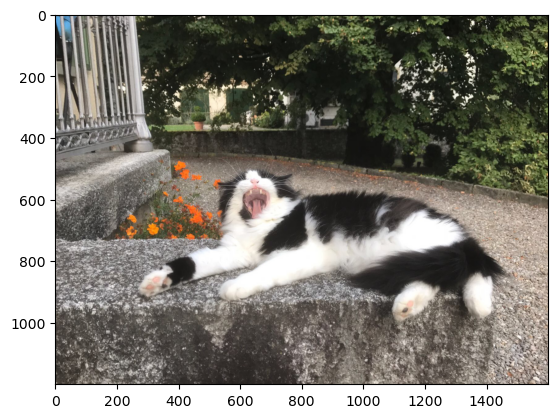

In [19]:
img = Image.open(datapath.joinpath("../data/woody_baille.JPG"))
plt.imshow(img);

In [43]:
# preprocess image to input into nn

def preproc(image):
    image_np = np.array(img)
    image_tensor = torch.tensor(image_np, dtype=torch.float32)
    #image_tensor = image_tensor.permute(2,0,1) # channel, height, width
    image_tensor = image_tensor.unsqueeze(0)

    return image_tensor


In [44]:
image_tensor = preproc(img)

In [45]:
image_tensor.size()
# (batch_size, height, width, channels)

torch.Size([1, 1200, 1600, 3])

*Instantiate your model with the appropriate size*

In [48]:
# Initialize the model
model = Mynetwork(3, 1200, 1600 )

*Run the image through the network and turn the output into a numpy array*

In [51]:
output = model(image_tensor)
output

tensor([[ 3.0612, -0.1037]], grad_fn=<AddmmBackward0>)

In [52]:
output.shape

torch.Size([1, 2])

In [55]:
output.detach().numpy() 

array([[ 3.0611742 , -0.10365542]], dtype=float32)